In [90]:
# Setup enviroment to autoreload packages
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Use a linear interpolator, and a reverse greedy process
from matplotlib.pyplot import *
from numpy import interp, linspace, sin, pi, array, std, inf, arange, log, argmax, argmin
from scipy.interpolate import interp1d as linterp
#
from nrutils import scsearch,gwylm,maketaper,romline,pylim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Use linear interpolation on a sin wave

In [91]:
x = 2*pi*linspace(0,1,6)
y = sin(x)

xx = 2*pi*linspace(0,1,50)
yy = linterp(x,y)(xx)

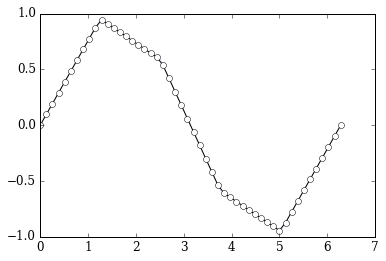

In [92]:
figure()
plot(x,y,'b',alpha=0.1)
plot(xx,yy,'-ok',mfc='w')

## Reverse greedy until N points remain

In [93]:
# Domain and range 
d = 0.5*pi*linspace(-1,1,30)
r = sin(d)
# 
nknots,L = romline( d, r, 8 )
pknots,L = romline( d, r, 8, positive=True )

0.013273889546
0.013273889546
0.013273889546
0.013273889546
0.013273889546
0.013273889546
0.013273889546
0.013273889546
0.013273889546
0.013273889546


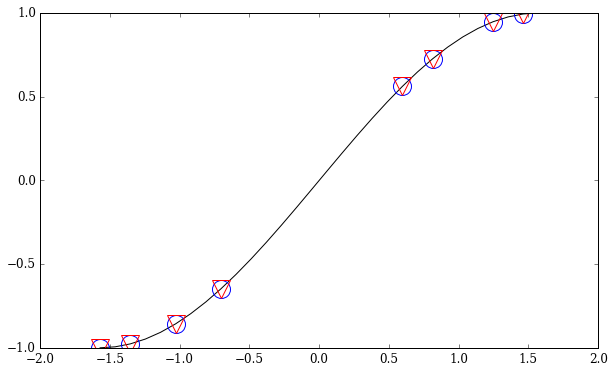

In [94]:
figure( figsize=2*array([5,3]) )
plot( d, r, 'k' )
plot( d[pknots], r[pknots], 'bo', ms=18, mfc='none', mec='b', mew=1 )
plot( d[nknots], r[nknots], 'bv', ms=18, mfc='none', mec='r', mew=1 )

In [95]:
A = scsearch(keyword='athena',nonspinning=True,q=2,unique=True,verbose=True)

[scsearch]>> Found keyword (='athena') keyword.
[scsearch]>> Found nonspinning (=True) keyword.
[scsearch]>> Found q (=2) keyword.
[scsearch]>> Found unique (=True) keyword.
[scsearch]>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 unique simulations:
[0001][athena] HR-series: ns-q2.00



In [96]:
y = gwylm( A[0], lm = [4,4], verbose=True, dt = 0.5, clean=True )

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.5) keyword.
(gwylm)>> Found lm (=[4, 4]) keyword.
(gwylm)>> Found load (=True) keyword.
(gwylm)>> Found lowpass (=False) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x10c165050>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(load)>> Loading: Ylm_WEYLSCAL4::Psi4r_l4_m4_r75.00.asc
(gwylm.setfields)>> Interpolating data to dt=0.500000
(gwylm.setfields)>> Interpolating data to dt=0.500000
(load)>> Re-orienting waveform phase to be consistent with internal sign convention for Psi4, where sign(dPhi/dt)=1*sign(m). Note that the internal sign convention is defined in ... nrutils/core/__init__.py as "M_RELATIVE_SIGN_CONVENTION". This message has appeared becuase the waveform is determioned to obey and sign convention: sign(dPhi/dt)=-1*sign(m).
(load)>> Loading: Ylm_WEYLSCAL4::Psi4r_l2_m2_r75.00.asc
(gwylm.setfields)>> Interpolating data to dt=0.500000
(gwylm.setfields)>> Interpolating data to dt

In [100]:
f = y.hlm[0].f[ y.ylm[0].f>0 ]
amp = y.hlm[0].fd_amp[ y.hlm[0].f>0 ]

lf = log(f)
lamp = log(amp)
N = 8
pknots,prom = romline(lf,lamp,N,positive=True,verbose=True)
# nknots,nrom = romline(lf,lamp,N,positive=False,verbose=True)

0.0900468157028
0.075044188219
0.0886798218234
0.0840886709718
0.075044188219


[  12   36  152  265  347  460  863 1253]
[12 36]


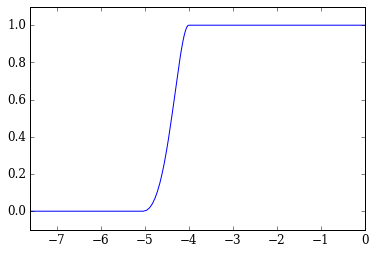

In [101]:
print pknots
state = pknots[[0,1]]
print state
window = maketaper( lamp, state )

plot( lf, window )
pylim(lf,window)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


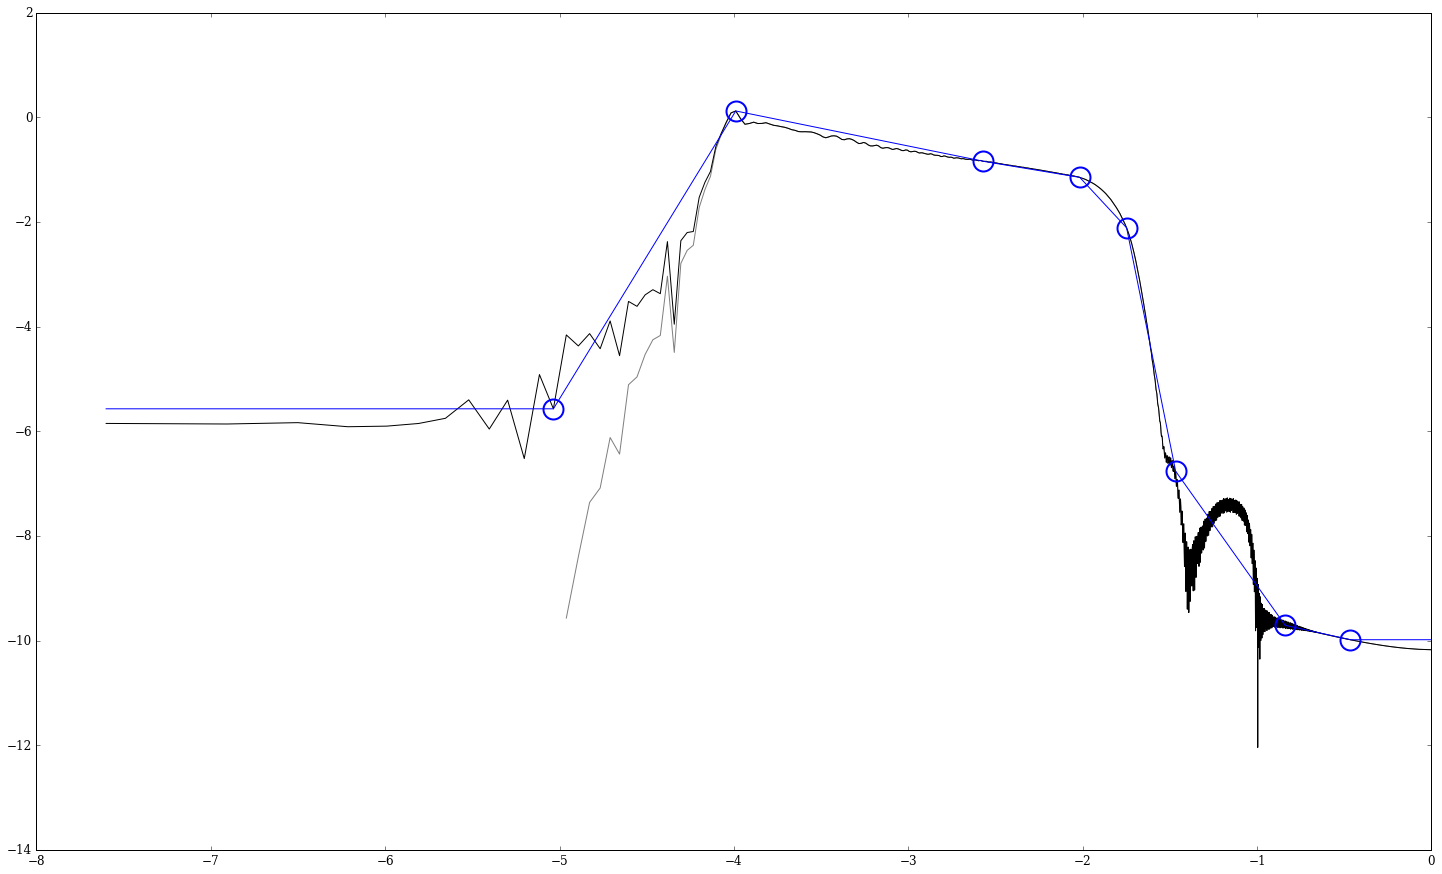

In [102]:
figure( figsize=5*array([5,3]) )
plot( lf, lamp, 'k' )
plot( lf, lamp+log(window), 'k', alpha = 0.5 )
plot( lf[pknots], lamp[pknots], 'o', ms = 20, mfc='none', mec='b', mew=2 )
plot( lf, prom(lf), '-b' )
# plot( lf[nknots], lamp[nknots], 'v', ms = 20, mfc='none', mec='r', mew=2 )
# plot( lf, nrom(lf), '-r' )